Kuzminov Artem

Task 1 - Run a Classification Tree.

You will need to perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.

In [1]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
#Data loading and preparation
iris = load_iris()
df_X = pandas.DataFrame(iris['data'], columns=iris['feature_names'])
df_X_binary = df_X.drop(list(range(0,50)))

y = iris.target
y_binary = y[50:]

X_train, X_test, y_train, y_test = train_test_split(df_X_binary, y_binary)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 4) (25, 4) (75,) (25,)


In [56]:
#Data example
df_X_binary.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [49]:
#Fitting the model
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

In [52]:
#Checking metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

Confusion matrix:
 [[10  0]
 [ 2 13]]
Accuracy: 0.92


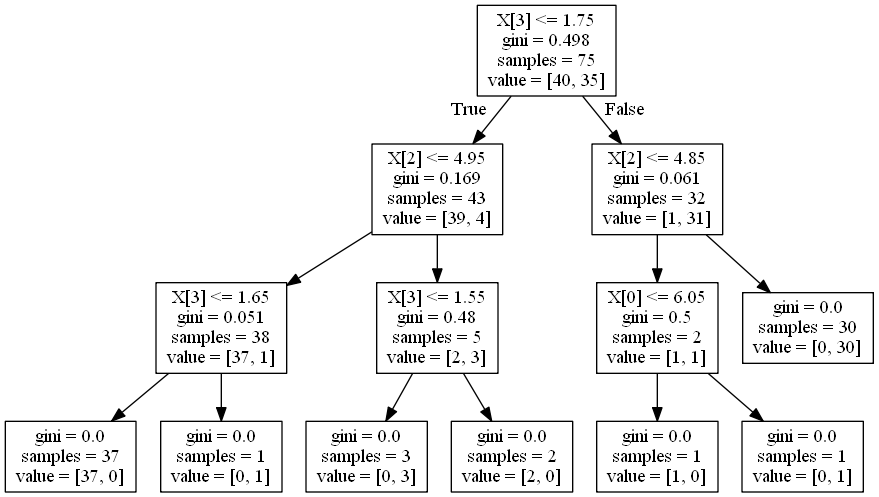

In [53]:
#Building tree scheme
from sklearn import tree
from io import StringIO
from IPython.display import Image
out = StringIO()
tree.export_graphviz(dec_tree,out_file = out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [57]:
print("Names of the explanatory variables:\n",iris['feature_names'])

Names of the explanatory variables:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The Iris data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
I dropped first 50 observations from the dataset to make the response variable binary. 

It is clear that the second explanatory variable (sepal width (cm)) is not represented in the tree, so it could be eliminated from the model.

There are two leaves with a big numbers of observations: the most left (37) and the most right (30) ones. They correspond to "false, false" branch and "true, true, true" branch.

Therefore, there is a strong relationship between forth explanatory variable (petal width (cm)) and the response variable (iris type) and also between third (petal length (cm)) explanatory variable and the response variable. Both of the mentioned explanatory variables describe petal part of the plant.